In [1]:
# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [2]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

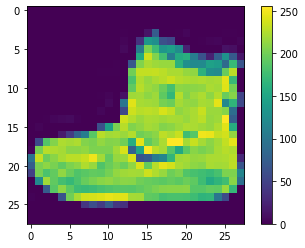

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

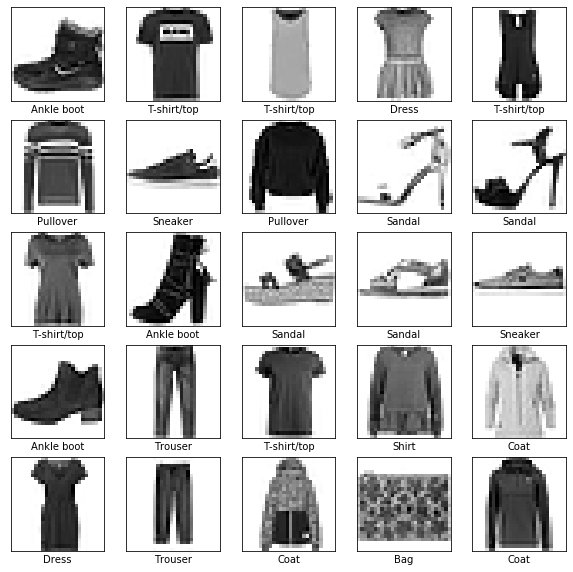

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


Y_test = test_labels 
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(train_labels )
y_test = np_utils.to_categorical(test_labels )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [15]:
hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model():
    # create model
    model = Sequential()
    #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [16]:
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 20us/sample - loss: 2.3023 - accuracy: 0.1283 - val_loss: 2.3021 - val_accuracy: 0.1724
Epoch 2/20
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3021 - accuracy: 0.1251 - val_loss: 2.3021 - val_accuracy: 0.0957
Epoch 3/20
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3020 - accuracy: 0.1242 - val_loss: 2.3021 - val_accuracy: 0.0957
Epoch 4/20
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3020 - accuracy: 0.1217 - val_loss: 2.3021 - val_accuracy: 0.0957
Epoch 5/20
48000/48000 [==============================] - 1s 13us/sample - loss: 2.3020 - accuracy: 0.1225 - val_loss: 2.3020 - val_accuracy: 0.0957
Epoch 6/20
48000/48000 [==============================] - 1s 14us/sample - loss: 2.3020 - accuracy: 0.1016 - val_loss: 2.3020 - val_accuracy: 0.0957
Epoch 7/20
48000/48000 [==============================] 

In [17]:
predictions = model.predict(X_test)
predictions[0]

array([0.09928203, 0.09980461, 0.09923641, 0.09998877, 0.09973297,
       0.10005219, 0.10113622, 0.10049182, 0.10028109, 0.09999391],
      dtype=float32)

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

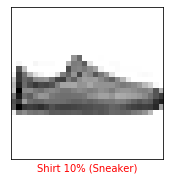

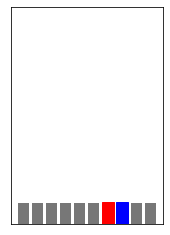

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

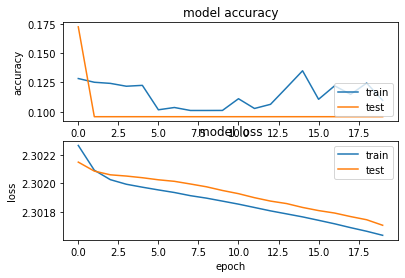

In [20]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

